In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp


from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('cleaned_bank_dataset_final.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Client ID
0,58,management,married,tertiary,no,0.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,3
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,45207
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,45208
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes,45209
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no,45210


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
 17  Client ID  45211 non-null  int64  
dtypes: float64(1), int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
df.describe()

In [ ]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Client ID
0,40,4,1,2,0,913,1,0,2,4,8,261,0,0,0,3,0,0
1,26,9,2,1,0,942,1,0,2,4,8,151,0,0,0,3,0,1
2,15,2,1,1,0,915,1,1,2,4,8,76,0,0,0,3,0,2
3,29,1,1,3,0,2417,1,0,2,4,8,92,0,0,0,3,0,3
4,15,11,2,3,0,914,0,0,2,4,8,198,0,0,0,3,0,4


In [ ]:
robust_scaler = RobustScaler()

X = df.drop(['y'], axis = 1)
y = df['y']

df[X.columns] = robust_scaler.fit_transform(X)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Client ID
0,1.266667,0.000000,0.0,1.0,0.0,-0.314726,0.0,0.0,1.0,-0.846154,0.4,0.375000,-0.5,0.0,0.0,0.0,0,-1.000000
1,0.333333,0.833333,1.0,0.0,0.0,-0.286814,0.0,0.0,1.0,-0.846154,0.4,-0.134259,-0.5,0.0,0.0,0.0,0,-0.999956
2,-0.400000,-0.333333,0.0,0.0,0.0,-0.312801,0.0,1.0,1.0,-0.846154,0.4,-0.481481,-0.5,0.0,0.0,0.0,0,-0.999912
3,0.533333,-0.500000,0.0,2.0,0.0,1.132820,0.0,0.0,1.0,-0.846154,0.4,-0.407407,-0.5,0.0,0.0,0.0,0,-0.999867
4,-0.400000,1.166667,1.0,2.0,0.0,-0.313763,-1.0,0.0,1.0,-0.846154,0.4,0.083333,-0.5,0.0,0.0,0.0,0,-0.999823


<Axes: >

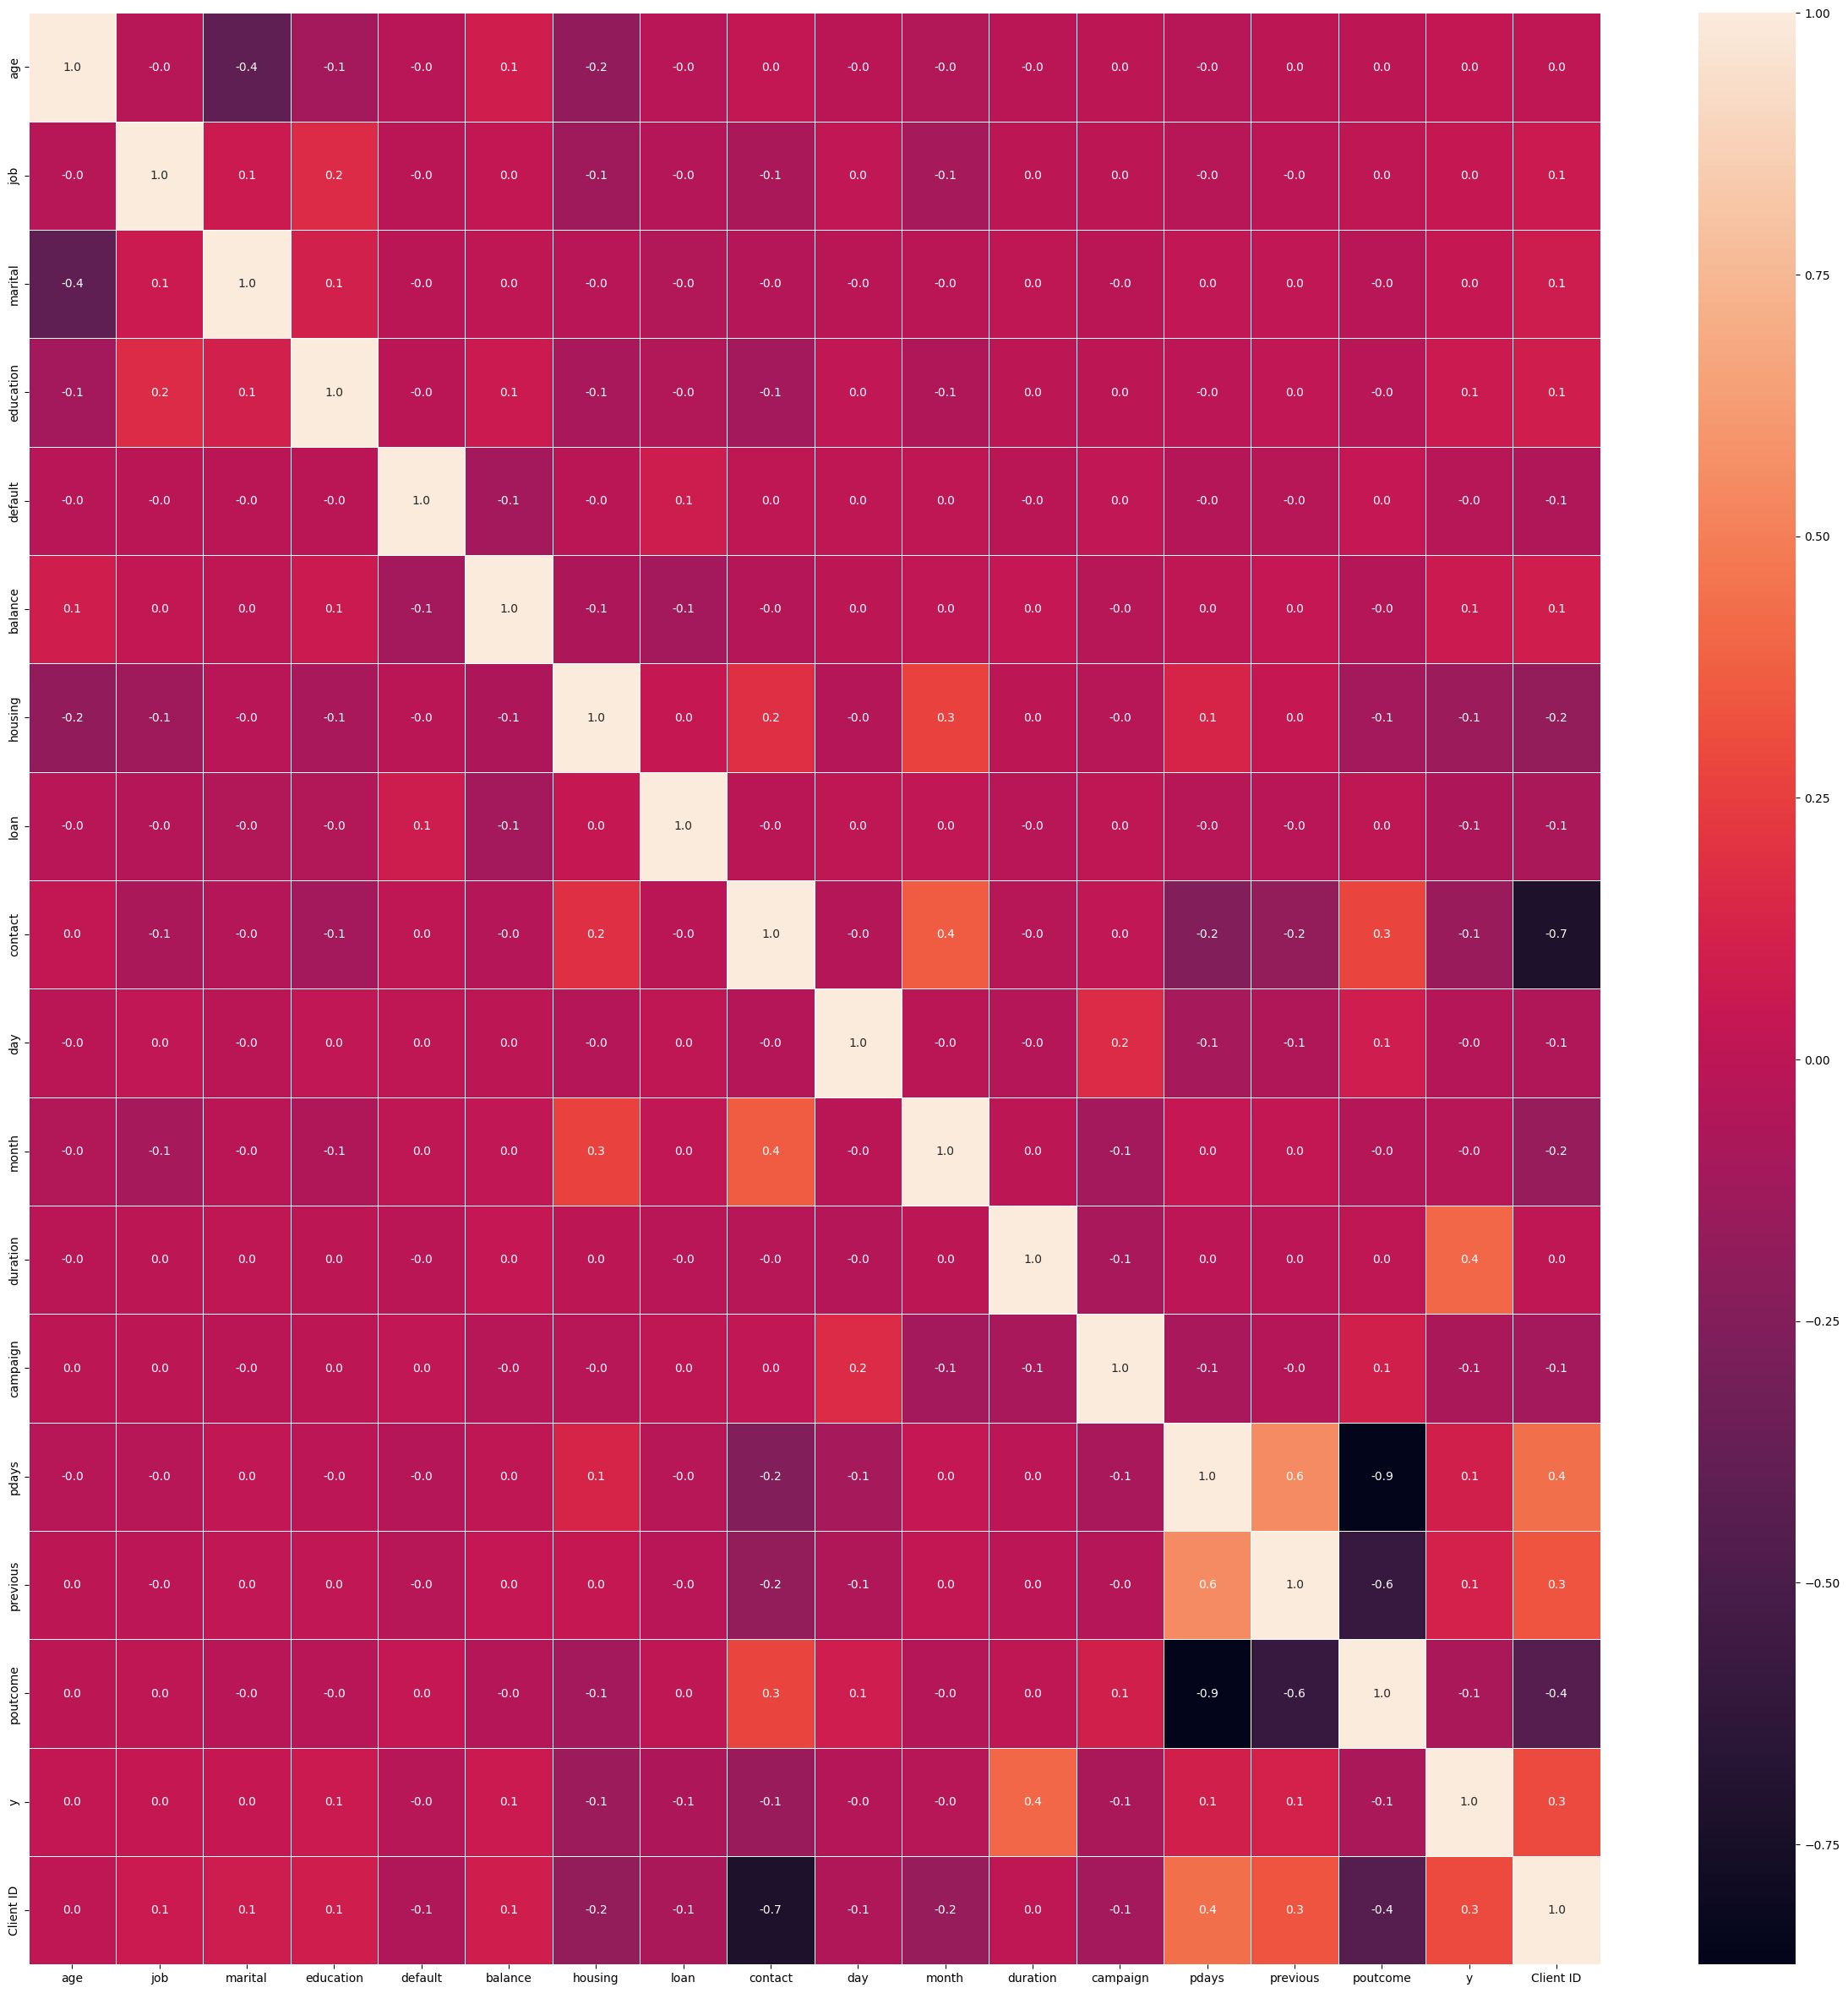

In [ ]:
# Mendapatkan nilai korelasi (koefisien Person) atribut numerik, dengan method "corr"
df_corr = df.corr(method='pearson')

# Use heatmap to search for the most optimal feature
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [ ]:
X_scaled = df.drop(['y'], axis = 1)
y = df['y']

selector = SelectKBest(k=5)
X = selector.fit_transform(X,y)

In [ ]:
selector.get_feature_names_out(input_features=selector.feature_names_in_)

array(['housing', 'contact', 'duration', 'previous', 'Client ID'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, stratify=y, random_state = 123)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = x_train.values
X_test = x_test.values
y_train = y_train.values
y_test = y_test.values


In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
# Good iterations to evaluate different classifiers all at once
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("----------------------------------------------------------------------------------------")
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score" + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

----------------------------------------------------------------------------------------
Classifiers:  LogisticRegression Has a training score of 90.0 % accuracy score

----------------------------------------------------------------------------------------
Classifiers:  KNeighborsClassifier Has a training score of 89.0 % accuracy score

----------------------------------------------------------------------------------------
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score



In [ ]:
# Good iterations to evaluate different classifiers all at once
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    testing_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("----------------------------------------------------------------------------------------")
    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of", round(testing_score.mean(), 2) * 100, "% accuracy score" + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

----------------------------------------------------------------------------------------
Classifiers:  LogisticRegression Has a testing score of 90.0 % accuracy score

----------------------------------------------------------------------------------------
Classifiers:  KNeighborsClassifier Has a testing score of 89.0 % accuracy score

----------------------------------------------------------------------------------------
Classifiers:  DecisionTreeClassifier Has a testing score of 88.0 % accuracy score



### Conclusion

We tested this dataset using 3 different classifiers (LogisticRegression, KNeighborsClassifier, and DecisionTreeClassifier) to see which classifiers generates the most accurate prediction. From our cross-validation, LogisticRegression generates the most accurate prediction, which is 90% of accuracy.